In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import os

Chọn quả kiwi và tịnh tiến

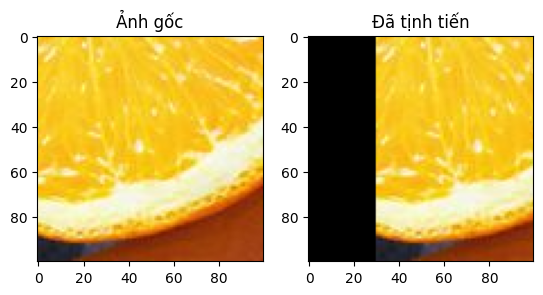

In [ ]:
# Đọc ảnh gốc
img = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")

# Cắt quả kiwi
kiwi = img[300:400, 380:480]  # Tùy chỉnh theo ảnh

# Tịnh tiến quả kiwi sang phải 30 pixel
moved_kiwi = nd.shift(kiwi, (0, 30, 0))

# Hiển thị ảnh
plt.subplot(1, 2, 1)
plt.imshow(kiwi)
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(moved_kiwi)
plt.title("Đã tịnh tiến")

plt.show()

# Lưu ảnh
iio.imwrite("kiwi_shifted.jpg", moved_kiwi.astype(np.uint8))

Chọn đu đủ và dưa hấu, đổi màu

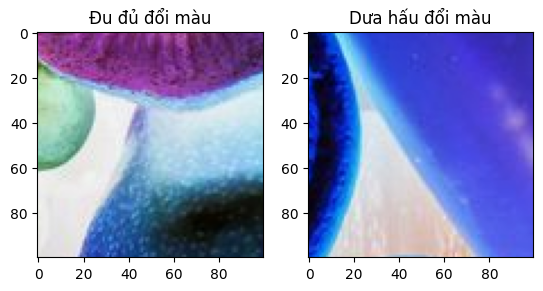

In [ ]:
# Đọc ảnh
img = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")

# Cắt đu đủ (vùng trái) và dưa hấu (vùng phải)
papaya = img[230:330, 150:250]
watermelon = img[230:330, 500:600]

# Đổi màu (âm ảnh)
def invert(img):
    return 255 - img

papaya_inv = invert(papaya)
watermelon_inv = invert(watermelon)

# Hiển thị
plt.subplot(1, 2, 1)
plt.imshow(papaya_inv)
plt.title("Đu đủ đổi màu")

plt.subplot(1, 2, 2)
plt.imshow(watermelon_inv)
plt.title("Dưa hấu đổi màu")

plt.show()

Chọn núi và thuyền, xoay 45 độ

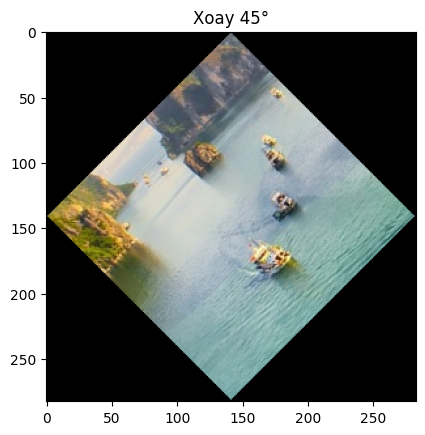

In [ ]:
img = iio.imread("exercise/quang_ninh.jpg")

# Cắt vùng có núi và thuyền
roi = img[150:350, 150:350]

# Xoay ảnh 45 độ
rotated = nd.rotate(roi, 45, reshape=True)

# Hiển thị
plt.imshow(rotated)
plt.title("Xoay 45°")
plt.show()

# Lưu ảnh
iio.imwrite("quangninh_rotated.jpg", rotated.astype(np.uint8))

Chọn chùa và phóng to 5 lần

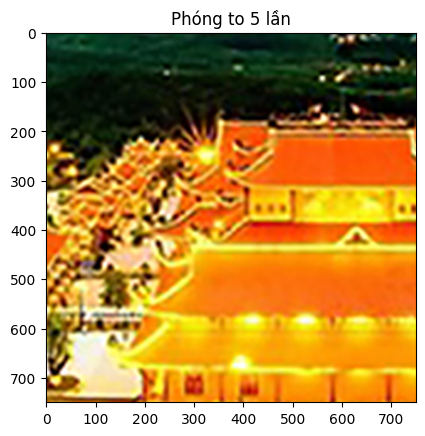

In [ ]:
img = iio.imread("exercise/pagoda.jpg")

# Cắt vùng chùa
chua = img[100:250, 150:300]

# Phóng to 5 lần
zoomed = nd.zoom(chua, (5, 5, 1))

# Hiển thị
plt.imshow(zoomed)
plt.title("Phóng to 5 lần")
plt.show()

# Lưu ảnh
iio.imwrite("pagoda_zoom.jpg", zoomed.astype(np.uint8))

Menu thực đơn

MENU:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate map
Nhập lựa chọn (T/X/P/H/C): H
Nhập tên file ảnh (ví dụ: fruit.jpg): pagoda.jpg


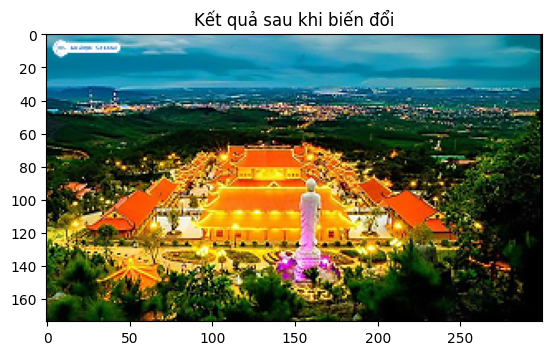

In [ ]:
def menu():
    print("MENU:")
    print("T - Tịnh tiến")
    print("X - Xoay")
    print("P - Phóng to")
    print("H - Thu nhỏ")
    print("C - Coordinate map")

menu()
choice = input("Nhập lựa chọn (T/X/P/H/C): ").upper()
file = input("Nhập tên file ảnh (ví dụ: fruit.jpg): ")

path = os.path.join("exercise", file)
img = iio.imread(path)

if choice == "T":
    result = nd.shift(img, (30, 30, 0))
elif choice == "X":
    result = nd.rotate(img, 45)
elif choice == "P":
    result = nd.zoom(img, (2, 2, 1))
elif choice == "H":
    result = nd.zoom(img, (0.5, 0.5, 1))
elif choice == "C":
    M = np.indices(img.shape[:2])
    d = 10
    q = 2 * d * np.random.random(M.shape) - d
    mp = (M + q).astype(int)
    result = nd.map_coordinates(img, mp, order=1, mode='reflect')
else:
    result = img

plt.imshow(result)
plt.title("Kết quả sau khi biến đổi")
plt.show()

Bài mở rộng

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

Tịnh tiến quả táo

In [ ]:
img = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")

apple = img[150:250, 250:350]
moved_apple = nd.shift(apple, (0, 30, 0))

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(apple)
plt.title("Quả táo gốc")

plt.subplot(1, 2, 2)
plt.imshow(moved_apple)
plt.title("Tịnh tiến quả táo")

plt.show()

# Lưu kết quả
iio.imwrite("apple_shifted.jpg", moved_apple.astype(np.uint8))


Bài mở rộng

In [1]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

chạy code và thử thay đổi tọa độ để chọn một đối tượng khác (ví dụ: quả táo)

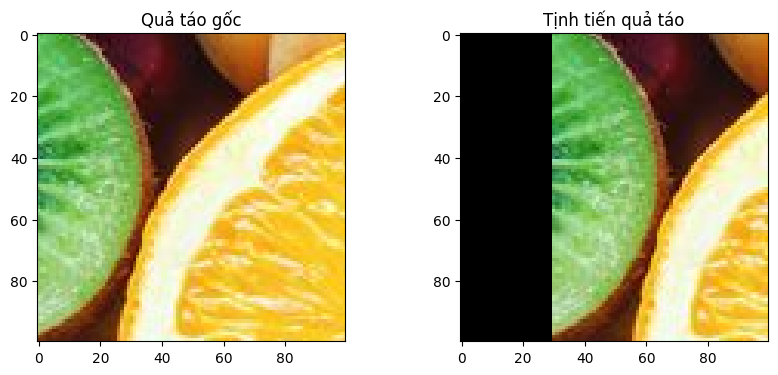

In [3]:
img = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")

apple = img[150:250, 250:350]
moved_apple = nd.shift(apple, (0, 30, 0))

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(apple)
plt.title("Quả táo gốc")

plt.subplot(1, 2, 2)
plt.imshow(moved_apple)
plt.title("Tịnh tiến quả táo")

plt.show()

# Lưu kết quả
iio.imwrite("apple_shifted.jpg", moved_apple.astype(np.uint8))


thay đổi (100, 25) thành (50, -30) và quan sát kết quả sau đó nhận xét

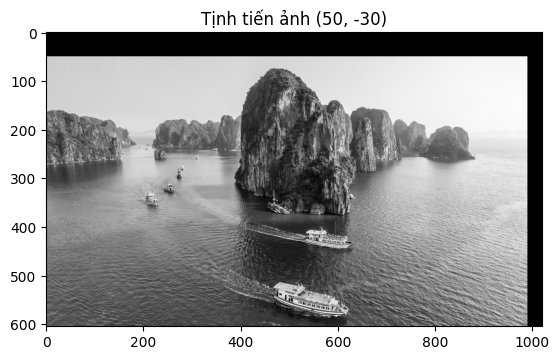

In [5]:
img = iio.imread("exercise/quang_ninh.jpg", mode='L')
shifted = nd.shift(img, (50, -30))

plt.imshow(shifted, cmap='gray')
plt.title("Tịnh tiến ảnh (50, -30)")
plt.show()

# Lưu kết quả
iio.imwrite("quangninh_shifted.jpg", shifted.astype(np.uint8))


Khi giảm độ tịnh tiến từ (100, 25) về (50, -30), ảnh dịch ít hơn về phía dưới và ngược chiều ngang (sang trái thay vì sang phải).

Tịnh tiến với giá trị âm như -30 sẽ làm mất phần ảnh ở mép phải và chèn thêm vùng đen bên trái.

Việc chọn vector tịnh tiến ảnh hưởng trực tiếp đến vị trí hiển thị của đối tượng chính và vùng ảnh bị cắt mất.

Phóng to thu nhỏ

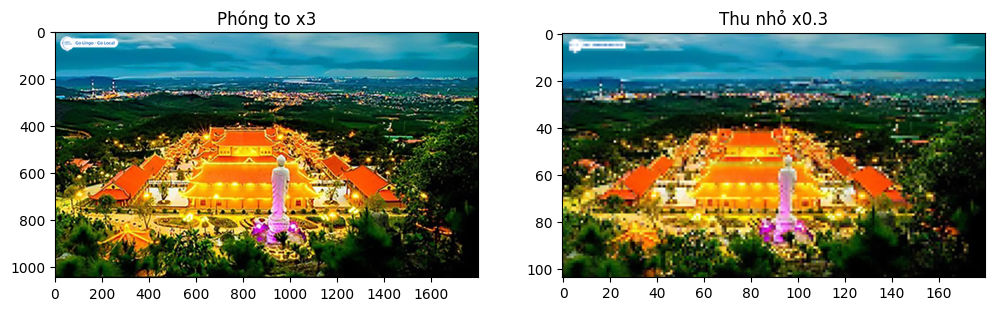

In [6]:
img = iio.imread("exercise/pagoda.jpg")

zoomed_large = nd.zoom(img, (3, 3, 1))
zoomed_small = nd.zoom(img, (0.3, 0.3, 1))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(zoomed_large)
plt.title("Phóng to x3")

plt.subplot(1, 2, 2)
plt.imshow(zoomed_small)
plt.title("Thu nhỏ x0.3")

plt.show()

# Lưu kết quả
iio.imwrite("pagoda_zoom_x3.jpg", zoomed_large.astype(np.uint8))
iio.imwrite("pagoda_zoom_x0_3.jpg", zoomed_small.astype(np.uint8))


xoay 45 độ với reshape=True và reshape=False sau đó nhận xét

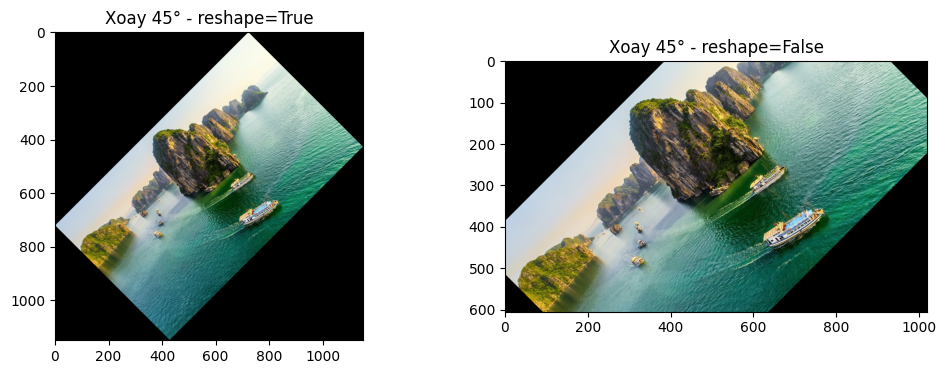

In [7]:
img = iio.imread("exercise/quang_ninh.jpg")

rot_true = nd.rotate(img, 45, reshape=True)
rot_false = nd.rotate(img, 45, reshape=False)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(rot_true)
plt.title("Xoay 45° - reshape=True")

plt.subplot(1, 2, 2)
plt.imshow(rot_false)
plt.title("Xoay 45° - reshape=False")

plt.show()

# Lưu kết quả
iio.imwrite("quangninh_rotated_true.jpg", rot_true.astype(np.uint8))
iio.imwrite("quangninh_rotated_false.jpg", rot_false.astype(np.uint8))


reshape=True: cho phép mở rộng kích thước ảnh đầu ra để giữ toàn bộ nội dung sau xoay, do đó tránh bị cắt mất các góc. Tuy nhiên, sẽ tạo thêm viền đen ở xung quanh ảnh.

reshape=False: giữ nguyên kích thước ảnh gốc, nhưng điều đó khiến một phần ảnh bị xoay sẽ vượt ra ngoài khung và bị cắt mất (đặc biệt ở 4 góc).

5. Dilation và Erosion
thay đổi size=(5, 5) và quan sát sự khác biệt sau đó nhận xét

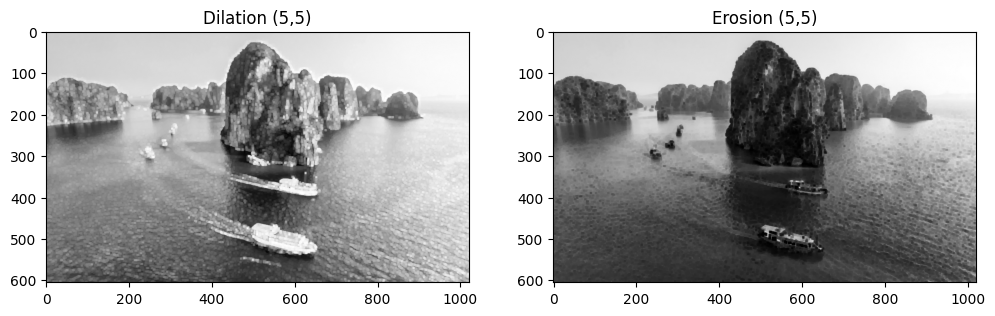

In [9]:
img = iio.imread("exercise/quang_ninh.jpg", mode='L')

dilated = nd.grey_dilation(img, size=(5,5))
eroded = nd.grey_erosion(img, size=(5,5))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(dilated, cmap='gray')
plt.title("Dilation (5,5)")

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Erosion (5,5)")

plt.show()

# Lưu kết quả
iio.imwrite("quangninh_dilated.jpg", dilated.astype(np.uint8))
iio.imwrite("quangninh_eroded.jpg", eroded.astype(np.uint8))


Khi tăng kích thước kernel lên (5,5), hiệu ứng của Dilation và Erosion trở nên mạnh hơn nhiều.

Dilation với kernel lớn sẽ làm các vùng sáng lan rộng mạnh, ảnh nhìn sáng mịn nhưng mất chi tiết biên rõ rệt.

Erosion làm vùng tối chiếm ưu thế, khiến ảnh trở nên "co rút", và nhiều chi tiết nhỏ có thể bị biến mất hoàn toàn.

Kích thước kernel càng lớn → hiệu ứng biến đổi càng rõ rệt → nên dùng thận trọng tùy theo mục đích (lọc nhiễu hay xử lý hình dạng).

sử dụng công thức toán học
thay đổi hàm GeoFun (ví dụ: thay cos bằng sin).

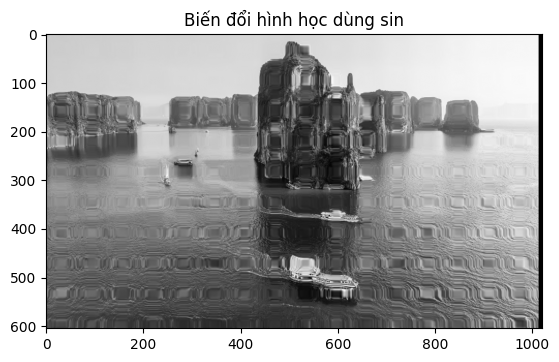

In [11]:
def GeoFunSin(outcoord):
    a = 10 * np.sin(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1]/10.0) + outcoord[1]
    return a, b

img = iio.imread("exercise/quang_ninh.jpg", mode='L')
transformed = nd.geometric_transform(img, GeoFunSin)

plt.imshow(transformed, cmap='gray')
plt.title("Biến đổi hình học dùng sin")
plt.show()

# Lưu kết quả
iio.imwrite("quangninh_transform_sin.jpg", transformed.astype(np.uint8))
